# Getting data from the web - APIs

### HTTP requests and responses

An easy method of getting data for machine learning applications is to use Web based Application Programming Interfaces (APIs). A web based API is a structured way to expose specific functionality and provide data access to users. The main limitation of this form of data gathering is that in order to access such data, the website resource needs to support this functionality and make it available. 

In order to interact with an API you usually make an HTTP request to a specific URL (an "endpoint") and get the data back encapsulated in an HTTP response. The most relevant request method to retrieve information is GET (but there are other methods: POST, PUT, DELETE that provide additional functionality to the API). The HTTP response payload from the server serving the data is usually in JSON or XML format.

Making HTTP requests within Python is very easy using the  `requests` library.

In [1]:
import requests
response = requests.get('http://example.com')

Now, we have an HTTP Response object called `response`. This `response` contains information about the original HTTP request we made as a client and the HTTP response from the server.

Let's look first at the HTTP request we just made to the server:

In [5]:
response.request.url

'http://example.com/'

In [6]:
response.request.headers

{'User-Agent': 'python-requests/2.21.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

There is a bunch of additional information encapsulated in the HTTP requests object:

In [9]:
dir(response.request)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_body_position',
 '_cookies',
 '_encode_files',
 '_encode_params',
 '_get_idna_encoded_host',
 'body',
 'copy',
 'deregister_hook',
 'headers',
 'hooks',
 'method',
 'path_url',
 'prepare',
 'prepare_auth',
 'prepare_body',
 'prepare_content_length',
 'prepare_cookies',
 'prepare_headers',
 'prepare_hooks',
 'prepare_method',
 'prepare_url',
 'register_hook',
 'url']

Let's now look at the HTTP response object:

In [10]:
response.status_code

200

In [11]:
response.headers

{'Content-Encoding': 'gzip', 'Age': '488733', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Wed, 04 Mar 2020 05:31:36 GMT', 'Etag': '"3147526947+ident+gzip"', 'Expires': 'Wed, 11 Mar 2020 05:31:36 GMT', 'Last-Modified': 'Thu, 17 Oct 2019 07:18:26 GMT', 'Server': 'ECS (sjc/4E68)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '648'}

In [12]:
response.headers['Server']

'ECS (sjc/4E68)'

In [13]:
response.encoding

'UTF-8'

In [14]:
response.cookies

<RequestsCookieJar[]>

We can read the payload content of the server's HTTP response, in this case an HTML document in minified form as exists in http://example.com:

In [15]:
response.text # the Payload of the HTTP response, in this case containing the HTML of the page

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

this is how you make an HTTP POST request:

In [16]:
response = requests.post('http://httpbin.org/post', data = {'OP':'Otago Polytechnic'})
response.status_code

200

The server at `http://httpbin.org` has been configured to return an HTTP response to HTTP POST Requests. The HTTP response payload `http://httpbin.org` contains among other data the payload we uploaded in our HTTP request, in our case: the `data` dictionary.

In [17]:
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "OP": "Otago Polytechnic"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "20", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.21.0", \n    "X-Amzn-Trace-Id": "Root=1-5e5f3dfd-c9c7c0323a111b6cd4d2e8e2"\n  }, \n  "json": null, \n  "origin": "202.49.0.2", \n  "url": "http://httpbin.org/post"\n}\n'

Other HTTP request types: PUT, DELETE, HEAD and OPTIONS are all just as simple:

In [18]:
response = requests.put('http://httpbin.org/put', data = {'key':'value'}) #Returns PUT data.
response = requests.delete('http://httpbin.org/delete') #/delete Returns DELETE data
response = requests.head('http://httpbin.org/get')
response = requests.options('http://httpbin.org/get')

You often want to send some sort of data in the URL's query string. If you were constructing the URL by hand, this data would be given as key/value pairs in the URL after a question mark, e.g. `httpbin.org/get?key=val`. The `requests` library allows you to provide these arguments as a dictionary of strings, using the `params` keyword argument. As an example, if you wanted to pass `key1=value1` and `key2=value2` to `httpbin.org/get`, you would use the following code:

In [19]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('http://httpbin.org/get', params=payload)

You can see that the URL has been correctly encoded by printing the URL:

In [20]:
print(r.url)

http://httpbin.org/get?key1=value1&key2=value2


If you'd like to add HTTP headers to a request, simply pass in a dict to the headers parameter.

In [21]:
url = 'http://httpbin.org/put'
headersDictionary = {'user-agent': 'I\'m a fake browser'}

r = requests.get(url, headers=headersDictionary)
r.request.headers

{'user-agent': "I'm a fake browser", 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

Typically, you want to send some form-encoded data — much like an HTML form. To do this, simply pass a dictionary to the `data` argument. Your dictionary of data will automatically be form-encoded when the request is made:

In [22]:
payload = {'key1': 'value1', 'key2': 'value2'}

response = requests.post("http://httpbin.org/post", data=payload)
print(r.text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>405 Method Not Allowed</title>
<h1>Method Not Allowed</h1>
<p>The method is not allowed for the requested URL.</p>



### Binary Response Content

You can also access the response body as bytes, for non-text requests. For example, to create an image from binary data returned by a request for an image located at https://i.ytimg.com/vi/kZw-jgCRPeE/maxresdefault.jpg

![](https://i.ytimg.com/vi/kZw-jgCRPeE/maxresdefault.jpg)

you can use the following code:

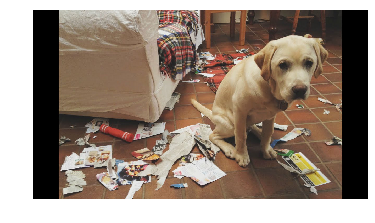

In [23]:
%matplotlib inline
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

response = requests.get('https://i.ytimg.com/vi/kZw-jgCRPeE/maxresdefault.jpg')

binaryImage = Image.open(BytesIO(response.content))
binaryImage.save('./imageRetrievedFromTheWeb.png')
imgplot = plt.imshow(binaryImage)
plt.axis('off')
plt.show()

### Retrieving Data from APIs

Let's now use HTTP requests and responses to retrieve data from web APIs. `requests` objects have a builtin JSON decoder, in case you're dealing with JSON data.

Let's query the Food and Drugs administration (FDA) of the United States for how many adverse effects have been recorded for the category of drugs known as *nonsteroidal anti-inflammatory drugs*.

In [24]:
import requests
response = requests.get('https://api.fda.gov/drug/event.json?search=patient.drug.openfda.pharm_class_epc:"nonsteroidal+anti-inflammatory+drug"&count=patient.reaction.reactionmeddrapt.exact')
response.json()

{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.',
  'terms': 'https://open.fda.gov/terms/',
  'license': 'https://open.fda.gov/license/',
  'last_updated': '2019-12-14'},
 'results': [{'term': 'DRUG INEFFECTIVE', 'count': 901},
  {'term': 'NAUSEA', 'count': 830},
  {'term': 'FATIGUE', 'count': 723},
  {'term': 'DYSPNOEA', 'count': 687},
  {'term': 'HEADACHE', 'count': 643},
  {'term': 'DIZZINESS', 'count': 632},
  {'term': 'PAIN', 'count': 584},
  {'term': 'VOMITING', 'count': 546},
  {'term': 'DIARRHOEA', 'count': 507},
  {'term': 'ASTHENIA', 'count': 436},
  {'term': 'ARTHRALGIA', 'count': 414},
  {'term': 'CHEST PAIN', 'count': 410},
  {'term': 'MALAISE', 'count': 403},
  {'term': 'MYOCARDIAL INFARCTION', 'count': 401},
  {'term': 'PYREXIA', 'co

Let's use a different API. This time, to find out the current weather in Dunedin

In [26]:
response = requests.get('http://api.openweathermap.org/data/2.5/weather?q=Dunedin,nz&appid=f6b6fecf2c4292d8d19d201e57667588&mode=json')
response.json()

{'coord': {'lon': 170.5, 'lat': -45.87},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 285.93,
  'feels_like': 282.75,
  'temp_min': 285.93,
  'temp_max': 285.93,
  'pressure': 1022,
  'humidity': 62},
 'wind': {'speed': 3.13, 'deg': 186, 'gust': 4.02},
 'clouds': {'all': 0},
 'dt': 1583300140,
 'sys': {'type': 3,
  'id': 75281,
  'country': 'NZ',
  'sunrise': 1583259500,
  'sunset': 1583306489},
 'timezone': 46800,
 'id': 2191562,
 'name': 'Dunedin',
 'cod': 200}

And yet another API: This one a financial API to find out the stock price of Apple Corporation (stock symbol: AAPL). Unfortunately, this API requires an API key. You need to register at [https://www.alphavantage.co/support/#api-key](https://www.alphavantage.co/support/#api-key) to get one. Documentation about how to use the API can be found at [https://www.alphavantage.co/documentation/](https://www.alphavantage.co/documentation/)

In [17]:
response = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=YOUR-API-KEY-GOES-HERE')
response.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2020-03-04',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2020-03-04': {'1. open': '296.4400',
   '2. high': '303.4000',
   '3. low': '293.1300',
   '4. close': '302.7400',
   '5. volume': '54667414'},
  '2020-03-03': {'1. open': '303.6700',
   '2. high': '304.0000',
   '3. low': '285.8000',
   '4. close': '289.3200',
   '5. volume': '79323743'},
  '2020-03-02': {'1. open': '282.2800',
   '2. high': '301.4400',
   '3. low': '277.7200',
   '4. close': '298.8100',
   '5. volume': '85349339'},
  '2020-02-28': {'1. open': '257.2600',
   '2. high': '278.4100',
   '3. low': '256.3700',
   '4. close': '273.3600',
   '5. volume': '106721230'},
  '2020-02-27': {'1. open': '281.1000',
   '2. high': '286.0000',
   '3. low': '272.9600',
   '4. close': '273.5200',
   '5. volume': '80151381'},
  '2020-02-26': {'1. open': '28

That's a lot of information. Let's just look at the latest closing price using the convenient transformation (deserialization) provided by the `request` library `json` method of the JSON data type into a Python dictionary:

In [24]:
list(response.json()['Time Series (Daily)'].values())[0]['4. close']

'302.7400'

Usually with an API we want to exploit the volume of information at our disposal. Let's look at historical time series data of Apple stock price over the last 5 years:

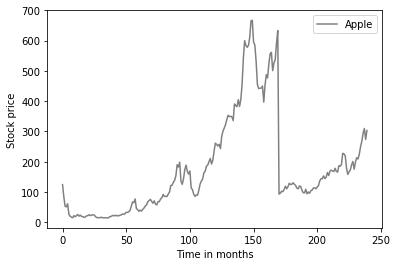

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
responseApple = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=AAPL&apikey=YOUR-API-KEY-GOES-HERE')

priceApple = []
for a in list(responseApple.json()['Monthly Time Series'].values()):
    priceApple.append(float(a['4. close']))
plt.plot(priceApple[::-1],c='grey',label='Apple')#We need to reverse the data so x axis goes from past to present 
leg = plt.legend(loc='best')
plt.xlabel("Time in months")
plt.ylabel("Stock price")
plt.show()

 Let's compare Apple stock performance with other tech giants: Google and Facebook.

In [31]:
responseApple = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=AAPL&apikey=YOUR-API-KEY-GOES-HERE')
responseGoogle = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=GOOG&apikey=YOUR-API-KEY-GOES-HERE')
responseFacebook = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=FB&apikey=YOUR-API-KEY-GOES-HERE')

priceApple = []
priceGoogle = []
priceFacebook = []
for a,g,f in zip(list(responseApple.json()['Monthly Time Series'].values()),
                 list(responseGoogle.json()['Monthly Time Series'].values()),
                 list(responseFacebook.json()['Monthly Time Series'].values())):
    priceApple.append(float(a['4. close']))
    priceGoogle.append(float(g['4. close']))
    priceFacebook.append(float(f['4. close']))

Let's plot the performance of this stock over the last 6 years:

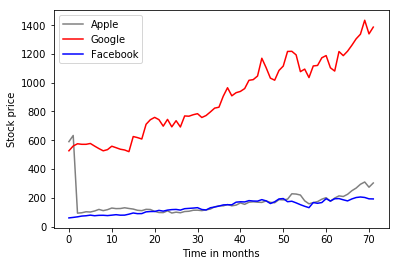

In [33]:
%matplotlib inline 
# the previous line is not needed if you are working in Spyder
import matplotlib.pyplot as plt 
plt.plot(priceApple[::-1],c='grey',label='Apple')
plt.plot(priceGoogle[::-1],c='red',label='Google')
plt.plot(priceFacebook[::-1],c='blue',label='Facebook')

leg = plt.legend(loc='best')
plt.xlabel("Time in months")
plt.ylabel("Stock price")
plt.show()

What about retrieving the latest news. Again, we need to register: (https://newsapi.org/register)[https://newsapi.org/register]
Let's retrieve the latest headlines from the BBC:

In [47]:
url = "https://newsapi.org/v1/articles?source=bbc-news&sortBy=top&apiKey=YOUR-API-KEY-GOES-HERE"
response = requests.get(url)
for article in response.json()['articles']:
    print(article['description'])

Michael Bloomberg ends his bid for the White House after his poor Super Tuesday showing and supports Joe Biden.
A four-way contest soon became a two-horse race as the results rolled in from 14 US states.
Joe Biden has won nine of the 14 states that voted to pick a Democratic presidential nominee on Super Tuesday. Here are the full results so far.
There are now at least 118 cases of Covid-19 in the US, including nine deaths.
The Tennessee tornadoes have killed 25 people and injured many more. About 44,000 people are without power.
The release of No Time To Die is pushed from April to November as coronavirus continues to spread.
A total of 107 people have now died in Italy, home to Europe's biggest coronavirus outbreak.
A defence department linguist is accused of sharing data with an individual linked to Hezbollah.
President Nicolás Maduro tells women to have more children, amid severe food shortages in the country.
The driver was rescued from the cab seconds before it exploded. He escap

and from Reuters:

In [83]:
url = "https://newsapi.org/v1/articles?source=reuters&sortBy=top&apiKey=YOUR-API-KEY-GOES-HERE"
response = requests.get(url)
for article in response.json()['articles']:
    print(article['description'])

Two more people have died of the new coronavirus in the United States, bringing the toll to 11, and new confirmed cases were reported on Wednesday around the two most populous cities, New York and Los Angeles.
The search for a Democrat to challenge Republican President Donald Trump in the Nov. 3 election narrowed on Wednesday to a choice between Bernie Sanders and Joe Biden, who staged a comeback in Super Tuesday voting to become the undisputed standard-bearer of the party's moderate wing.
Amazon.com Inc should stop third-party sellers from price gouging for items like Purell hand sanitizer as people seek to protect themselves from the coronavirus, U.S. Senator Edward Markey said in a letter to the online retailer on Wednesday.
U.S. Chief Justice John Roberts on Wednesday issued an unusual rebuke of "dangerous" comments by top U.S. Senate Democrat Chuck Schumer about two conservative Supreme Court justices appointed by President Donald Trump and how they might rule in a major abortion 

If you inspect the HTTP response, you will notice that some news item have also a link to the image accompanying the article:

In [84]:
response.json()

{'status': 'ok',
 'source': 'reuters',
 'sortBy': 'top',
 'articles': [{'author': 'Steve Gorman',
   'title': 'California, Washington state deaths add to U.S. coronavirus toll',
   'description': 'Two more people have died of the new coronavirus in the United States, bringing the toll to 11, and new confirmed cases were reported on Wednesday around the two most populous cities, New York and Los Angeles.',
   'url': 'http://feeds.reuters.com/~r/reuters/topNews/~3/cttMyFA3nEM/california-washington-state-deaths-add-to-u-s-coronavirus-toll-idUSKBN20R28H',
   'urlToImage': 'https://s1.reutersmedia.net/resources/r/?m=02&d=20200304&t=2&i=1498764198&w=1200&r=LYNXMPEG231Y1',
   'publishedAt': '2020-03-04T21:39:50Z'},
  {'author': 'Jason Lange',
   'title': "Biden's Super Tuesday surge reshapes Democratic race, Bloomberg drops out",
   'description': "The search for a Democrat to challenge Republican President Donald Trump in the Nov. 3 election narrowed on Wednesday to a choice between Bernie S

Let's plot the image for the first headline:

https://s1.reutersmedia.net/resources/r/?m=02&d=20200304&t=2&i=1498764198&w=1200&r=LYNXMPEG231Y1


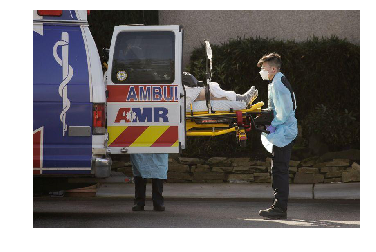

In [85]:
from PIL import Image
import requests
from io import BytesIO

url = "https://newsapi.org/v1/articles?source=reuters&sortBy=top&apiKey=YOUR-API-KEY-GOES-HERE"
response = requests.get(url)
imageUrl = response.json()['articles'][0]['urlToImage']
print(imageUrl)

response = requests.get(imageUrl)
binaryImage = Image.open(BytesIO(response.content))
imgplot = plt.imshow(binaryImage)
plt.axis('off')
plt.show()

Let's now search for news articles talking about bitcoin:

In [42]:
url = "http://newsapi.org/v2/everything?q=bitcoin&apiKey=YOUR-API-KEY-GOES-HERE"
response = requests.get(url)
response.json()

{'status': 'ok',
 'totalResults': 4696,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Brian Barrett',
   'title': "The 'Robo Revenge' App Makes It Easy to Sue Robocallers",
   'description': "Mac malware, a Bitcoin mixer, and more of the week's top security news.",
   'url': 'https://www.wired.com/story/robo-revenge-apple-malware-security-news/',
   'urlToImage': 'https://media.wired.com/photos/5e471046e7120600088b2022/191:100/w_1280,c_limit/Security_robbocalls-84289419.jpg',
   'publishedAt': '2020-02-15T14:00:00Z',
   'content': "Just when you thought the catastrophic Equifax breach was entirely in the rearview, the Department of Justice this week charged four Chinese military hackers with the theft. That's 147.9 million people's Social Security numbers and other personal information … [+4002 chars]"},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Steven Levy',
   'title': 'Google, Amazon, and Apple Have a Trillion Dollar Problem',
   'descri

I hope you get the idea.

Obviously, to truly exploit an API, you need to spend some time reading the documentation so you know how to extract the relevant data you are looking for. For the previous news headlines API we have been using, you can find detailed documentation at: https://newsapi.org/docs

Finally, you can explore GitHub API. Notice the trivial usage of HTTPS authorization. Substitute your own username and password for GitHub in the `auth` argument below. 

In [ ]:
response = requests.get('https://api.github.com/user', auth=('user', 'pass'))
#response.status_code
response.json()

At https://github.com/toddmotto/public-apis you can find many more public APIs offering tons of data some of which perhaps you find interesting/useful.

### API library wrappers

Sometimes the owner of the data decides to provide developers with the convenience of a programming language specific wrapper library to access the data. When an API wrapper is available, you don't need to work directly with HTTP requests and instead you work with language specific function calls.  

The twitter API for instance provides API wrapper libraries for many programming languages, including Python. For using the Twitter API you can `pip install` a Python wrapper module around the Twitter API (https://github.com/bear/python-twitter) which facilitates interaction with the API from within Python. In your command prompt, simply type:

In [ ]:
!pip install python-twitter

Next, you will need to register with Twitter and then create an APP at https://apps.twitter.com. Next, you will need to set up the python-twitter module with you API keys: https://python-twitter.readthedocs.io/en/latest/getting_started.html. You can then fill your own API key credentials in the following code snippet:

In [69]:
import twitter
#use your own API credentials here

api = twitter.Api(consumer_key="",
                  consumer_secret="",
                      access_token_key="",
                  access_token_secret="")

Let's start by getting the user timeline of a user with screen name @elonmusk:

In [70]:
import pandas as pd
## get the user timeline with screen_name = '@elonmusk'
twitter_statuses = api.GetUserTimeline(screen_name = '@elonmusk')

## create a data frame
## first get a list of panda Series or dict
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]

## then create the data frame
data = pd.DataFrame(pdSeriesList)

#let's just print the top 4 for illustration purposes
data.head(4)

,created_at,hashtags,id,id_str,lang,retweet_count,retweeted_status,source,text,urls,user,user_mentions,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,truncated,media
0,Thu Feb 07 01:35:35 +0000 2019,[],1093322348529278976,1093322348529278976,en,307,{'created_at': 'Wed Feb 06 16:42:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...","RT @MusaTariq: This is not new news, but for a...",[],{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 19606246, 'id_str': '19606246', 'name'...",NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Feb 06 23:17:59 +0000 2019,[],1093287719294230529,1093287719294230529,en,26,NaN,"<a href=""http://twitter.com/download/iphone"" r...","@StrikMichael Sorry, many unexpected challenge...",[{'expanded_url': 'https://twitter.com/i/web/s...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 1093183797141651463, 'id_str': '109318...",383.0,StrikMichael,1.093186e+18,1.093184e+18,True,NaN
2,Wed Feb 06 23:06:42 +0000 2019,[],1093284881386229761,1093284881386229761,und,929,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@SpaceX https://t.co/sO2s0OcM4L,[{'expanded_url': 'https://www.whereisroadster...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 34743251, 'id_str': '34743251', 'name'...",8187.0,SpaceX,1.093204e+18,3.474325e+07,NaN,NaN
3,Wed Feb 06 18:23:13 +0000 2019,[],1093213539848732673,1093213539848732673,en,3231,{'created_at': 'Wed Feb 06 17:44:09 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @SpaceX: One year ago today https://t.co/lA...,[{'expanded_url': 'https://www.youtube.com/wat...,{'created_at': 'Tue Jun 02 20:12:29 +0000 2009...,"[{'id': 34743251, 'id_str': '34743251', 'name'...",NaN,NaN,NaN,NaN,NaN,NaN


Let's fetch those tweets from user @elonmusk with more than 20 retweets:

In [71]:
## filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count>20]

## get the text of these tweets
tweet_text = maybe_interesting.text

## print them out
text = tweet_text.values

for t in text:
    print('######')
    print(t)

######
RT @MusaTariq: This is not new news, but for anyone who works in commerce/product, whether you ever want to buy a @Tesla or not, I encourag…
######
@StrikMichael Sorry, many unexpected challenges with cars coming through Zeebrugge first time. Cars will start movi… https://t.co/W0sjRmwe0l
######
@SpaceX https://t.co/sO2s0OcM4L
######
RT @SpaceX: One year ago today https://t.co/lAjw1HC8d5
######
@FancyPantless We’re doing everything we can to get there. It’s a super hard grind.
######
@notNahuel @SnazzyQ Exactly. Both prices are shown right next to each other &amp; lower price is *actually* the real ap… https://t.co/YU64OyWjST
######
@Gargant44992081 VAT of ~20% &amp; import duties of ~10% usually result in a 30% higher cost in Europe
######
Model 3 starting cost now ~$35k (after ~$8k of credits &amp; fuel savings) https://t.co/46TXqRrsdr
######
RT @TeslaMotorsClub: Model 3 Tops Consumer Reports Satisfaction Survey #Model3 https://t.co/VgHhCakYa6
######
💙 Mach Diamonds 💙
######
@j

Finally, let's query twitter for all the tweets from the Twitter user account `@elonmusk` mentioning the word **SpaceX**, since a given date, and let's limit the number of objects back to just 3.

In [72]:
results = api.GetSearch(raw_query="q=SpaceX&since=2016-09-19&from=elonmusk&count=3")
#print(results)
for r in results:
    print(r.text,"\n")

@SpaceX https://t.co/sO2s0OcM4L 

@jclishman @dguisinger @Erdayastronaut @DanielDavisA Will do, although SpaceX reddit is very well-informed. Really… https://t.co/KTzXNrIIRK 

First firing of Starship Raptor flight engine! So proud of great work by @SpaceX team!! https://t.co/S6aT7Jih4S 



## Aside: How to retrieve data when an API is not available?

Sometimes, a data scientist might be interested in gathering data from a web resource that doesn't offer a convenient API to access the data. It is still possible to do so by doing web scraping: crawling URLs of interest and parsing the corresponding html documents in search for the data of interest. We will look at this in detail in the next lecture. As a preview, you can try the following to capture the top news headlines from [http://www.nzherald.co.nz](http://www.nzherald.co.nz):

In [13]:
from lxml import html #lxml is a superfast library for parsing documents written in markup language

url = 'http://www.nzherald.co.nz' # our target website
response = requests.get(url) #We generate an HTTP request to the target website and store the HTTP response
dom = html.fromstring(response.text) #We parse the HTML document into a tree data structure (the DOM, or document object model)

# we use XPath (a query language for selecting nodes from XML documents) to select the HTML elements 
# containing the data that we are interested in
headlines = dom.xpath('//article[contains(@class,"story-hero")]//h3//a/text()') #We will learn XPATH in the next class
for h in headlines:
    print(h.strip())

How coronavirus affects those who catch it
Not funny: English prop faces lengthy ban for genital offence
Coronavirus: Hundreds of tourism jobs lost says industry group
John Tamihere confirms Parliament bid, hits out at 'clueless, motley crew'
Coronavirus: Hundreds of tourism jobs lost says industry group
Coronavirus: Why all the major parties want house prices to rise
Trump 'didn't know people died from the flu'. It killed his grandfather
All Blacks star's emergency surgery: Lengthy lay-off likely
Black Hands cast announced, newcomer cast as David Bain
Scores of people are killed each year at work - should a will be a standard employee benefit?
Harry and Meghan colour-coordinate for another final royal engagement
A gentle journey to Norway's second city


### APIs Resources:

- <a href="https://market.mashape.com/explore">Mashape</a> and <a href="https://apigee.com/providers">Apigee</a> allow you to explore tons of different APIs. Alternatively, a <a href="http://www.pythonforbeginners.com/api/list-of-python-apis"> Python API wrapper</a> is available for many popular APIs.

- <a href="https://realpython.com/blog/python/api-integration-in-python/"> API Integration in Python</a> provides a very readable introduction to REST APIs.